# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
from scipy import stats


Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [5]:
x_values=[17,51,27,21,36,48,19,26,54,30]
y_values=[10,1,5,9,4,2,9,6,0,3]

In [13]:
# Your code here. 

student_data = pd.DataFrame({'Age':x_values, 'Tardies':y_values})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

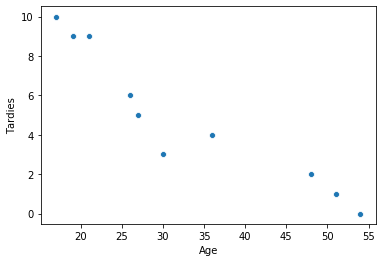

In [16]:
# Your code here.
sns.scatterplot(x="Age", y="Tardies", data=student_data);

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# Your response here. 
# I see in the graph that the youngest persons frequently are  more late than the oldest persons

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [18]:
# Your response here.
# Pearson correlation coefficient is a statistic that measures linear correlation between two variables X and Y
corr=student_data.corr()
corr

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [21]:
# Covariance
# In probability theory and statistics, covariance is a measure of the joint variability of two random variables.
cov=student_data.cov()
cov

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [30]:
r, _ = stats.pearsonr(student_data.Age, student_data.Tardies)
r

-0.939162688688712

In [35]:
mx, my =  student_data[["Age", "Tardies"]].mean()
sx, sy = student_data[["Age", "Tardies"]].std()

b = r * sy / sx
a = my - b * mx

Plot your regression model on your scatter plot.

Text(0.5, 1.0, 'Pearson correlation')

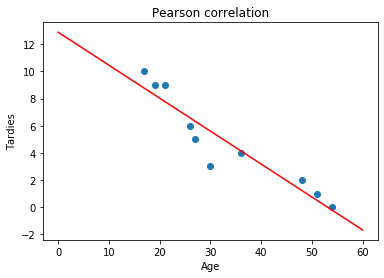

In [42]:
x = np.linspace(0,60,5)

plt.scatter(student_data.Age, student_data.Tardies)
plt.plot(x, a + b*x, c='red')
plt.gca().set_xlabel('Age')
plt.gca().set_ylabel('Tardies')
plt.gca().set_title('Pearson correlation')

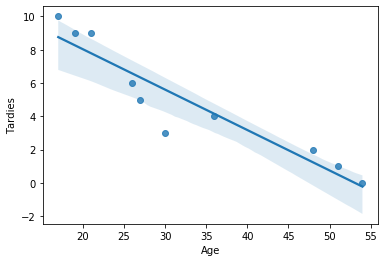

In [24]:
# Your response here.
sns.regplot(data=student_data, x="Age", y="Tardies"); #  lineal clara de regresion lineal

In [ ]:
# Your code here.

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Your response here.
# I see in the graph that the youngest persons frequently are  more late than the oldest persons and it is a descending slope

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [47]:
# Import any libraries you may need & the data
df = pd.read_csv('vehicles.csv')
df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [51]:
# Your response here. 
variables_list=['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG','Fuel Cost/Year',"CO2 Emission Grams/Mile"]
variables_corr=df[variables_list].corr()
variables_corr

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


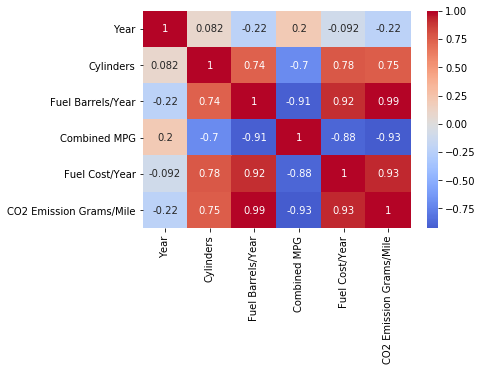

In [56]:
sns.heatmap(df[variables_list].corr(), cmap="coolwarm", annot =True, center= 0);

In [57]:
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [58]:
# Your response here.
X=df[['Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']]

In [60]:
y=df['CO2 Emission Grams/Mile']

In [62]:
lr= LinearRegression()

In [63]:
lr.fit(X,y)

LinearRegression()

In [65]:
lr.score(X,y)

0.9802919387898396

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [66]:
lr.fit(X_train, y_train)

LinearRegression()

In [67]:
lr.score(X_train, y_train)

0.9811054212203616

In [68]:
lr.score(X_test, y_test)

0.978340172218422

In [69]:
y_pred=lr.predict(X)
y_pred

array([519.48180108, 669.38059176, 550.88379153, ..., 232.9449228 ,
       232.9449228 , 242.60253832])

In [70]:
lr.coef_

array([ 1.00216597, 19.92381228, -3.03931894,  0.02812644])

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [72]:
# Your code here. 
df1 =pd.DataFrame({'People':[1,3,4,6,8,9,11,14], 'Attended':[1,2,4,4,5,7,8,13]})
df1

,People,Attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


In [75]:
df1.describe()

,People,Attended
count,8.000000,8.000000
mean,7.000000,5.500000
std,4.342481,3.817254
min,1.000000,1.000000
25%,3.750000,3.500000
50%,7.000000,4.500000
75%,9.500000,7.250000
max,14.000000,13.000000


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

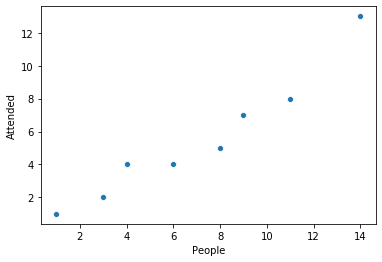

In [73]:
# Your code here.
sns.scatterplot(x="People", y="Attended", data=df1);

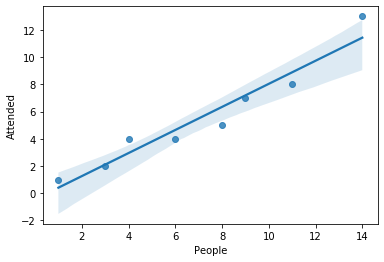

In [74]:
sns.regplot(x="People", y="Attended", data=df1);

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 
#I see a strong correlation between the variables, if you invite more number of persons it will result more people at the party

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [80]:
# Your response here. 



What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 